# 从零开始的线性回归

In [161]:
import random
import torch
from d2l.torch import *

## 生成数据集
$y=Xw+b+ϵ$

In [162]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

In [163]:
true_w = torch.tensor([2.27262])
true_b = 0
features, labels = synthetic_data(true_w,true_b,1000)

In [164]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([0.5533]) 
label: tensor([1.2450])


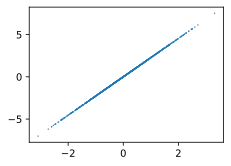

In [165]:
set_figsize()
plt.scatter(features[:,0].detach().numpy(),labels.detach().numpy(),0.2)

## 读取数据集

In [166]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        #print(batch_indices)
        yield features[batch_indices],labels[batch_indices]

In [167]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.8678],
        [-0.6838],
        [ 1.6071],
        [ 2.0700],
        [-1.1938],
        [ 1.4299],
        [-0.1913],
        [-0.2072],
        [-0.9272],
        [-2.6000]]) 
 tensor([[-4.2447],
        [-1.5401],
        [ 3.6500],
        [ 4.6997],
        [-2.7112],
        [ 3.2610],
        [-0.4290],
        [-0.4801],
        [-2.1160],
        [-5.9055]])


## 模型初始化

In [168]:
#w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
w = torch.randn((1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
w,b

(tensor([-0.8831], requires_grad=True), tensor([0.], requires_grad=True))

## 定义模型

In [169]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

## 定义损失函数

In [170]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2/2

## 定义优化算法

In [171]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练

In [172]:
lr = 0.001
num_epochs = 100
net = linreg
loss = squared_loss

In [173]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 4.150545
epoch 2, loss 3.381791
epoch 3, loss 2.755478
epoch 4, loss 2.245211
epoch 5, loss 1.829484
epoch 6, loss 1.490764
epoch 7, loss 1.214792
epoch 8, loss 0.989928
epoch 9, loss 0.806706
epoch 10, loss 0.657416
epoch 11, loss 0.535769
epoch 12, loss 0.436639
epoch 13, loss 0.355861
epoch 14, loss 0.290035
epoch 15, loss 0.236392
epoch 16, loss 0.192676
epoch 17, loss 0.157050
epoch 18, loss 0.128015
epoch 19, loss 0.104352
epoch 20, loss 0.085068
epoch 21, loss 0.069350
epoch 22, loss 0.056539
epoch 23, loss 0.046097
epoch 24, loss 0.037586
epoch 25, loss 0.030649
epoch 26, loss 0.024995
epoch 27, loss 0.020386
epoch 28, loss 0.016628
epoch 29, loss 0.013565
epoch 30, loss 0.011069
epoch 31, loss 0.009034
epoch 32, loss 0.007374
epoch 33, loss 0.006021
epoch 34, loss 0.004919
epoch 35, loss 0.004019
epoch 36, loss 0.003286
epoch 37, loss 0.002689
epoch 38, loss 0.002201
epoch 39, loss 0.001804
epoch 40, loss 0.001480
epoch 41, loss 0.001215
epoch 42, loss 0.001000
e

In [174]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')
w,b

w的估计误差: tensor([0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)


(tensor([2.2724], requires_grad=True), tensor([-0.0002], requires_grad=True))